In [1]:
import io
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
# import tensorflow as tf


def plot_alignment(alignment, path, info=None):
    fig, ax = plt.subplots()
    im = ax.imshow(
        alignment,
        aspect='auto',
        cmap='hot',
        origin='lower',
        interpolation='none')
    fig.colorbar(im, ax=ax)
    xlabel = 'Decoder Step'
    if info is not None:
        xlabel += '\n\n' + info
    plt.xlabel(xlabel)
    plt.ylabel('Encoder Step')
    plt.tight_layout()

    # save the alignment to disk
    plt.savefig(path, format='png')

#     # setup io buffer to hold image and return tensorflow version
#     buf = io.BytesIO()
#     plt.savefig(buf, format='png')
#     buf.seek(0)
#     plot = tf.image.decode_png(buf.getvalue(), channels=4)
#     plot = tf.expand_dims(plot, 0)
#     return plot

In [2]:
import sys
sys.path.append('/home/dawna/tts/qd212/lib_QDOU/')
from IO_wav_lab import *
from CMD_bash import *

import numpy
np = numpy

import matplotlib.pyplot as plt
import os
import cPickle as pickle

import random

def readLab(dirFile,dim_lab=163):
    data = numpy.fromfile(dirFile, dtype='float32')
    data = data.reshape((data.shape[0]/dim_lab),dim_lab)
    return data

def checkDim(pml,idx_dim,lim_x=[]):
    plt.plot(pml[:,idx_dim])
    if lim_x: plt.xlim(lim_x)
    plt.show()
    
def compareDim(pml,pml_ref,idx_dim,lim_x=[]):
    plt.plot(pml_ref[:,idx_dim],label='ref')
    plt.plot(pml[:,idx_dim],label='gen')
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()

def compareDim_list_2d(pml_list,label_list,idx_dim,lim_x=[]):
    for p,l in zip(pml_list,label_list):
        plt.plot(p[:,idx_dim],label=l)
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()
    
def compareDim_list_3d(pml_list,label_list,idx_dim,idx_row=0,lim_x=[]):
    for p,l in zip(pml_list,label_list):
        plt.plot(p[idx_row,:,idx_dim],label=l)
    if lim_x: plt.xlim(lim_x)
    plt.legend()
    plt.show()

In [3]:
file_list = get_file_list('/home/dawna/tts/qd212/data/lj/merlinData/file_id_list.scp')

In [8]:
# handle name difference in taco SS mode
dataFile_dir = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-asup/eval/npy/{}.npy'
for idx,name in enumerate(file_list[13050:13050+50]):
    cmd = 'mv {src} {tgt}'.format(src=dataFile_dir.format('eval-'+str(idx)),tgt=dataFile_dir.format(name))
#     exeCMD(cmd)

In [25]:
# name = 'LJ001-0073'
# for name in file_list[13050:13050+50]:
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-eal-align/eval/alignment/npy/%s.npy' % (name)
    dirFile_tgt = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-eal-align/eval/alignment/png/%s.png' % (name)
    # checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

LJ001-0073
LJ003-0229
LJ003-0296
LJ003-0304
LJ004-0208


In [4]:
# for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
for name in ['LJ050-0%d'%(i) for i in range(129,135)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163/gta/alignment/npy/%s_align.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [6]:
for name in ['LJ001-0001','LJ001-0073','LJ050-0278']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/gta/alignment/npy/%s_align.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [10]:
for name in ['eval-0']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/eval/alignment/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [8]:
data = np.load('/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/gta/alignment/npy/LJ001-0001_align.npy')
data_new = np.load('/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/gta/alignment_check/npy/LJ001-0001.npy')
print data.shape, data_new.shape
print np.array_equal(data,data_new)
print np.sum(abs(data-data_new))
print data[0,:10]
print data_new[0,:10]

(169, 800) (169, 800)
False
0.000188815
[  2.93975860e-01   2.36175284e-02   1.63163256e-03   2.53542647e-04
   6.13232405e-05   5.86546448e-05   3.83739171e-05   1.34423637e-04
   2.81018991e-04   2.52640923e-04]
[  2.93975979e-01   2.36175731e-02   1.63163105e-03   2.53542297e-04
   6.13230295e-05   5.86545611e-05   3.83739134e-05   1.34423710e-04
   2.81019427e-04   2.52641417e-04]


In [4]:
for name in ['LJ001-0001','LJ001-0003','LJ001-0073']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/gta/alignment_check/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [4]:
for name in ['LJ001-0001','LJ001-0073']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/eal/alignment_check/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [6]:
for name in ['eval-%d'%i for i in range(5)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/eval/alignment/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [3]:
for name in ['LJ001-000%d'%i for i in range(1,4)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-bk2orig/eval/alignment/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [13]:
# for name in file_list[12800:12800+3]:
# for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
for name in ['LJ050-0%d'%(i) for i in range(129,135)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-merlin/gta/alignment/npy/%s_align.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [7]:
for name in ['LJ001-0073','LJ003-0229']: # ,'LJ003-0296','LJ003-0304','LJ004-0208'
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-merlin-cmudict/gta/alignment/npy/%s_align.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [6]:
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
# for name in ['LJ050-0%d'%(i) for i in range(129,135)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/bkup/tacotron-pml-merlin-cmudict/gta/alignment_check/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [4]:
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
# for name in ['LJ050-0%d'%(i) for i in range(129,135)]:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-merlin-phone-punc/gta/alignment/npy/%s_align.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [5]:
for name in ['LJ001-0073','LJ003-0229','LJ003-0296','LJ003-0304','LJ004-0208']:
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-eal-joint50-merlin-online/gta/eval/alignment_check/npy/%s.npy' % (name)
    dirFile_tgt = dirFile_src.replace('npy','png')
    checkMakeDir(os.path.dirname(dirFile_tgt))
    _ = plot_alignment(np.load(dirFile_src), dirFile_tgt)

In [51]:
# 201908 re order data
# read
file_list = get_file_list('/home/dawna/tts/qd212/data/lj/merlinData/file_id_list.scp')
data_list = []
for k in ['train', 'validation', 'test']:
    with open('/scratch/qd212/tacotron/163-lj-training/%s.txt'%(k),'rb') as f:
        data_list += f.readlines()
name_list = [d.split('|')[-1][:-5] for d in data_list]
data_dict = dict(zip(name_list,data_list))

print file_list==name_list

# re order
data_list_merlin = [data_dict[n] for n in file_list]

# # save
# with open('/scratch/qd212/tacotron/163-lj-training/train_merlin.txt','wb') as f:
#     f.writelines(data_list_merlin[:12800])
# with open('/scratch/qd212/tacotron/163-lj-training/validation_merlin.txt','wb') as f:
#     f.writelines(data_list_merlin[12800:12800+150])
# with open('/scratch/qd212/tacotron/163-lj-training/test_merlin.txt','wb') as f:
#     f.writelines(data_list_merlin[12800+150:])

False


In [52]:
# C&A
data_list = []
for k in ['train', 'validation', 'test']:
    with open('/scratch/qd212/tacotron/163-lj-training/%s_merlin.txt'%(k),'rb') as f:
        data_list += f.readlines()
name_list = [d.split('|')[-1][:-5] for d in data_list]

print file_list==name_list

True


(1994, 163)
(1994,)


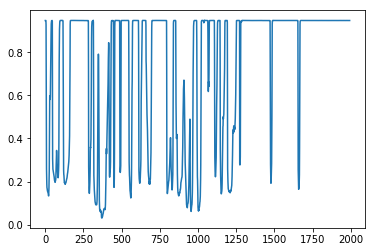

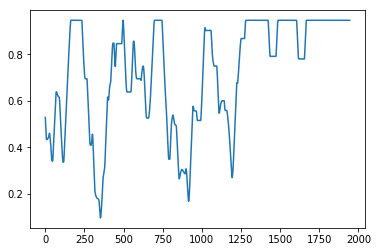

In [43]:
# 201909 cut speech properly
dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163/eval/npy/LJ001-0073.npy'
data = np.load(dirFile_src)
print data.shape

# for idx_dim in range(130,163,5):
#     print idx_dim
#     checkDim(data,idx_dim)
    
data_l1norm = np.sum(abs(data[:,145:]), axis=1) / 19 # data.shape[1]
print data_l1norm.shape
plt.plot(data_l1norm)
plt.show()

plt.plot(np.convolve(data_l1norm, np.ones((50,))/50, mode='valid'))
plt.show()

(1994, 163)
(1994,)


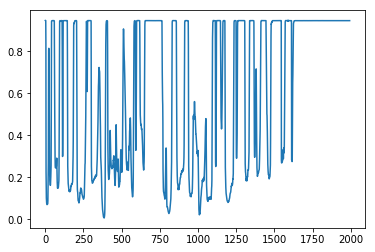

In [47]:
dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163/eval/npy/LJ003-0229.npy'
data = np.load(dirFile_src)
print data.shape

# for idx_dim in range(130,163,5):
#     print idx_dim
#     checkDim(data,idx_dim)
    
data_l1norm = np.sum(abs(data[:,145:]), axis=1) / 19
print data_l1norm.shape
plt.plot(data_l1norm)
plt.show()

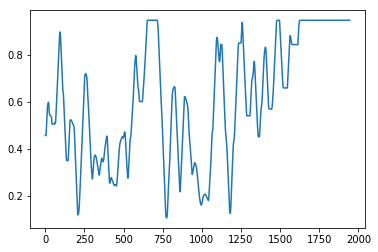

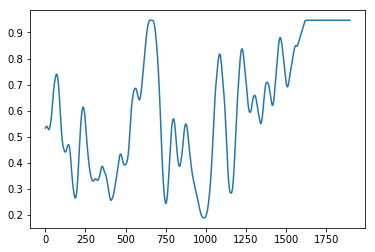

In [50]:
tmp = np.convolve(data_l1norm, np.ones((50,))/50, mode='valid')
plt.plot(tmp)
plt.show()

plt.plot(np.convolve(tmp, np.ones((50,))/50, mode='valid'))
plt.show()

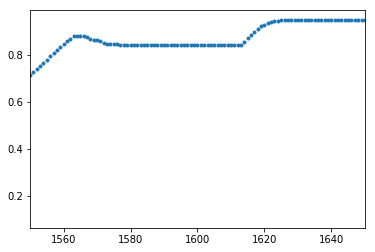

In [42]:
plt.plot(np.convolve(data_l1norm, np.ones((50,))/50, mode='valid'),'.')
plt.xlim([1550,1650]);
plt.show()

LJ001-0073 (1994, 163)
(1994,)


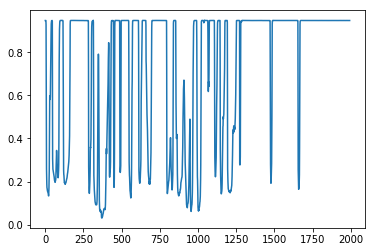

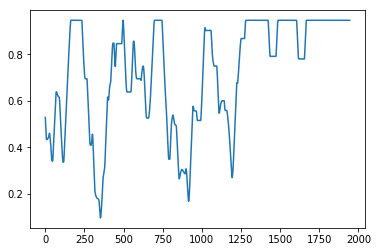

LJ003-0229 (1994, 163)
(1994,)


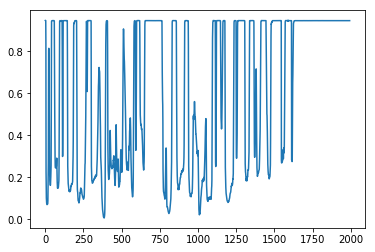

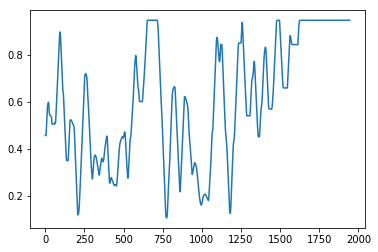

LJ003-0296 (1994, 163)
(1994,)


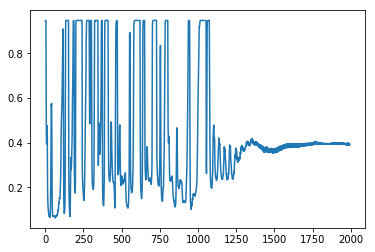

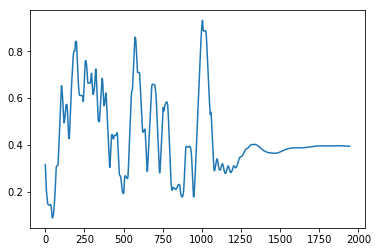

LJ003-0304 (1994, 163)
(1994,)


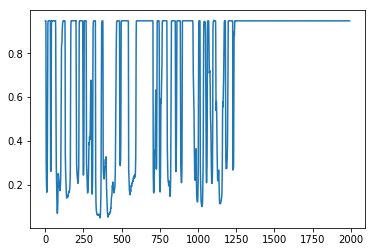

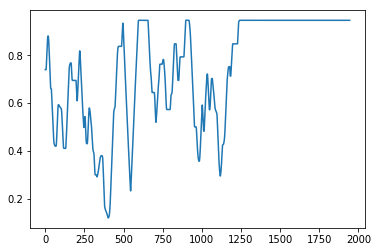

LJ004-0208 (1994, 163)
(1994,)


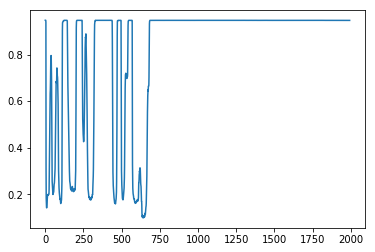

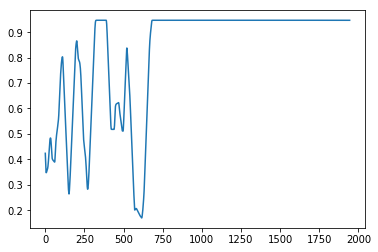

LJ005-0065 (1994, 163)
(1994,)


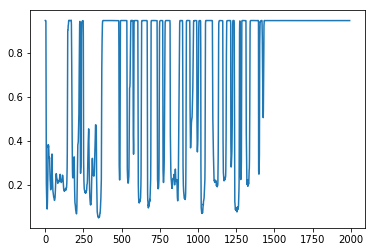

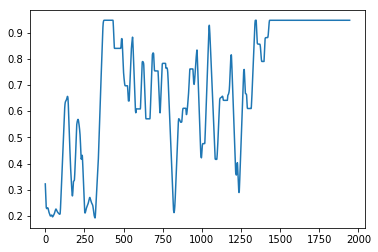

LJ005-0251 (1994, 163)
(1994,)


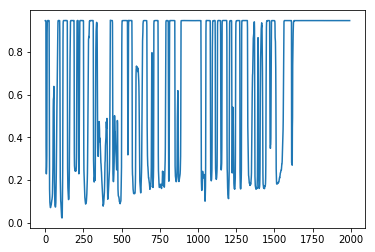

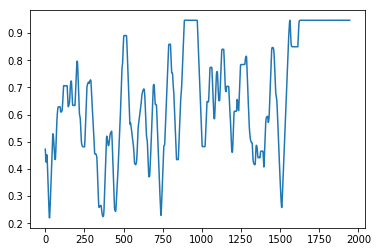

LJ008-0180 (1994, 163)
(1994,)


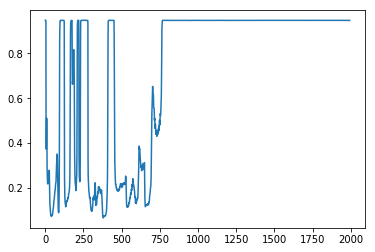

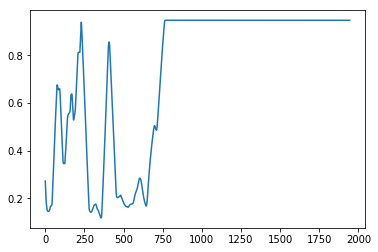

LJ008-0273 (1994, 163)
(1994,)


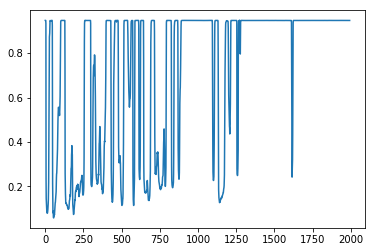

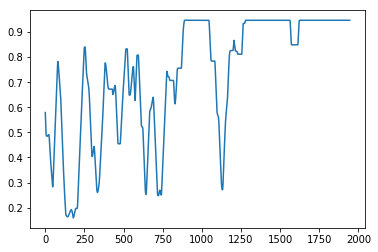

LJ008-0309 (1994, 163)
(1994,)


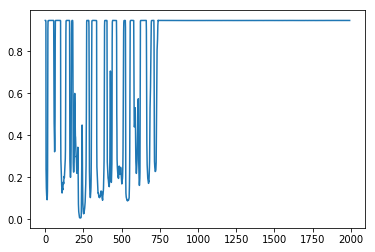

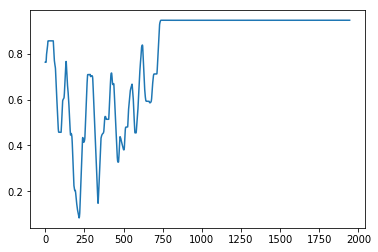

LJ009-0059 (1994, 163)
(1994,)


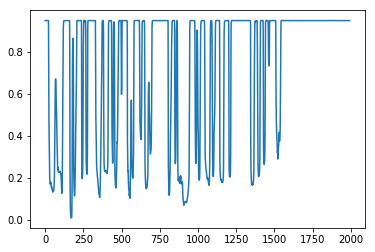

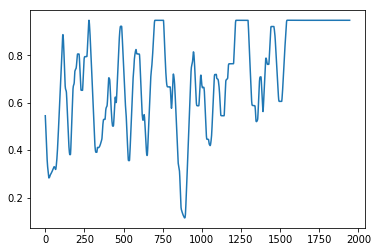

LJ010-0294 (1994, 163)
(1994,)


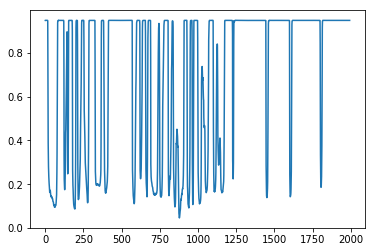

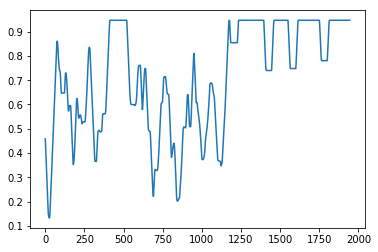

LJ011-0089 (1994, 163)
(1994,)


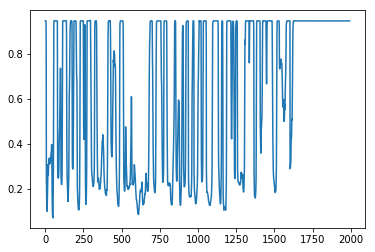

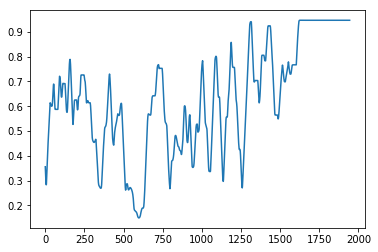

LJ014-0198 (1994, 163)
(1994,)


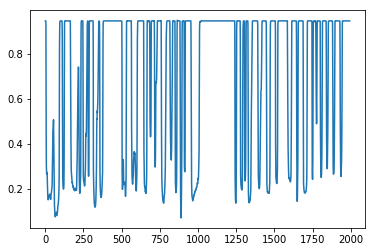

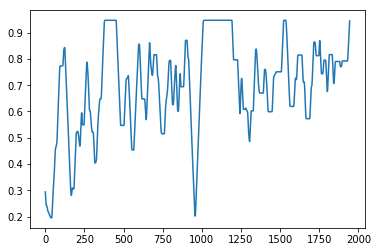

LJ016-0261 (1994, 163)
(1994,)


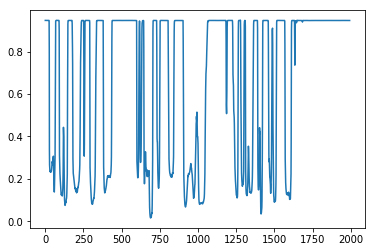

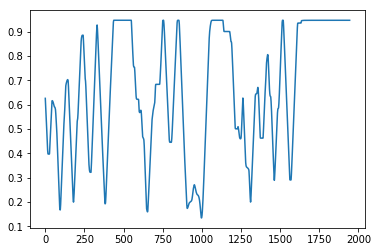

LJ018-0317 (1994, 163)
(1994,)


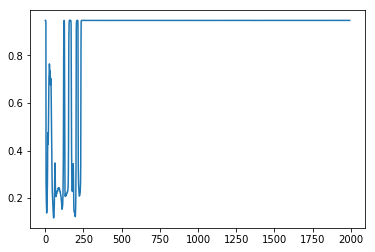

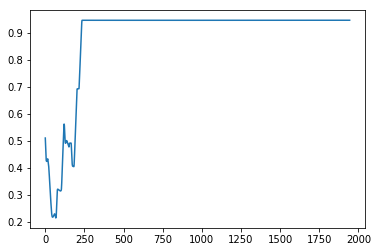

LJ019-0058 (1994, 163)
(1994,)


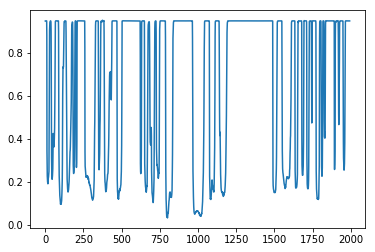

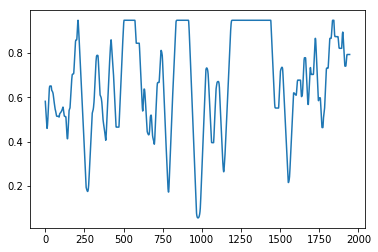

LJ019-0317 (1994, 163)
(1994,)


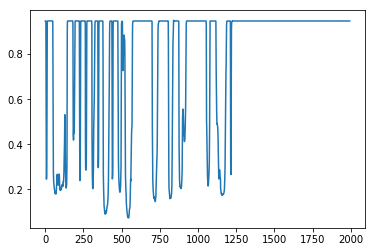

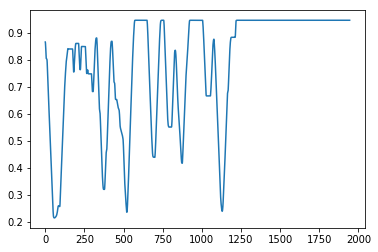

LJ019-0356 (1994, 163)
(1994,)


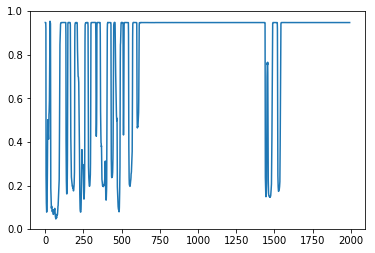

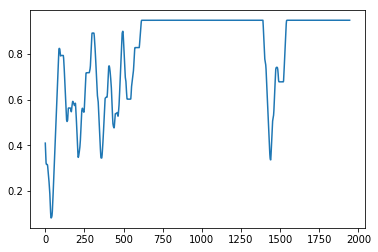

LJ020-0077 (1994, 163)
(1994,)


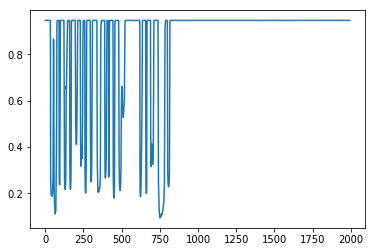

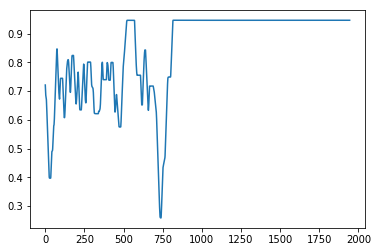

LJ022-0130 (1994, 163)
(1994,)


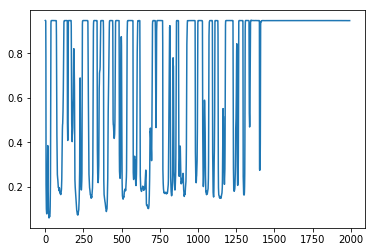

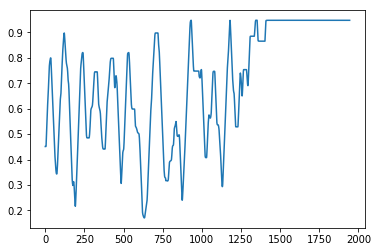

LJ022-0177 (1994, 163)
(1994,)


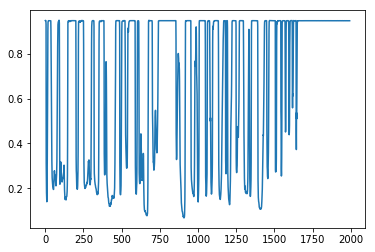

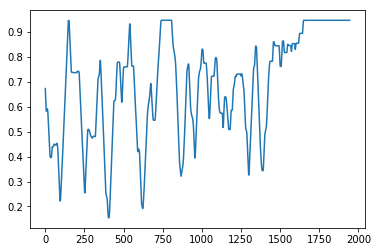

LJ024-0101 (1994, 163)
(1994,)


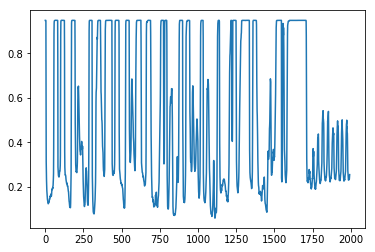

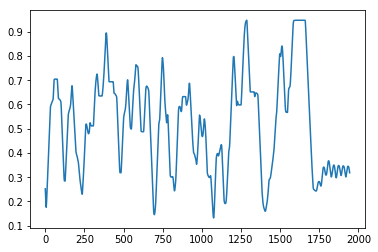

LJ027-0016 (1994, 163)
(1994,)


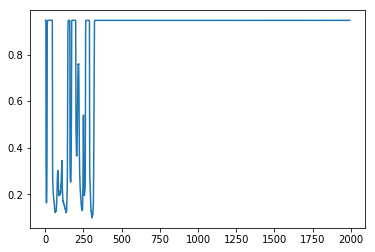

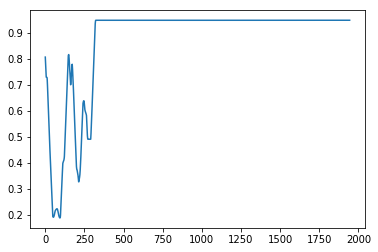

LJ027-0049 (1994, 163)
(1994,)


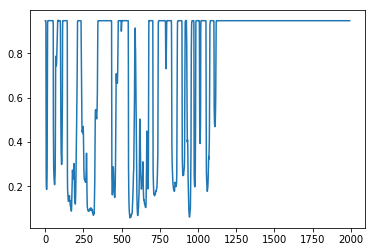

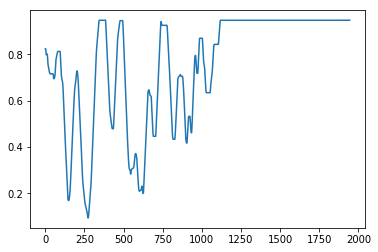

LJ028-0444 (1994, 163)
(1994,)


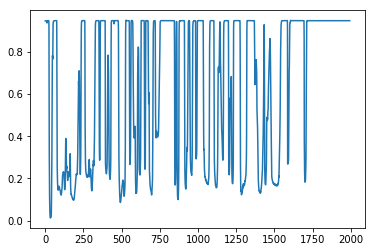

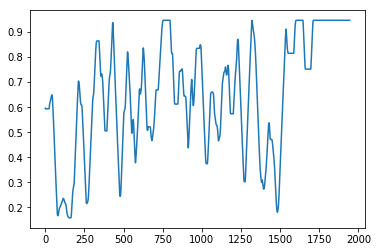

LJ030-0208 (1994, 163)
(1994,)


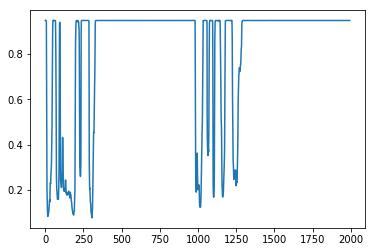

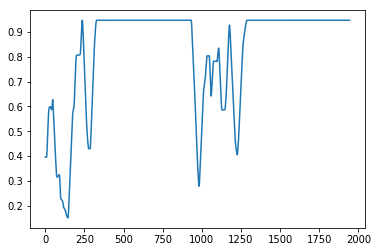

LJ032-0128 (1994, 163)
(1994,)


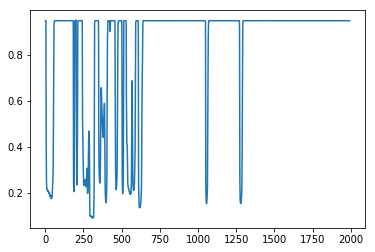

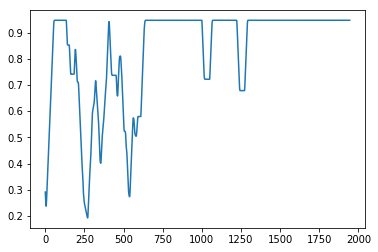

LJ034-0186 (1994, 163)
(1994,)


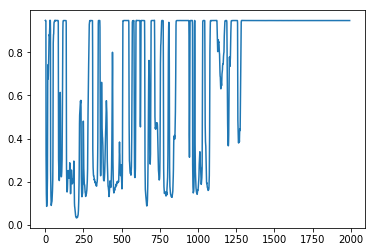

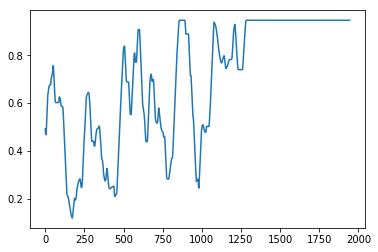

LJ035-0174 (1994, 163)
(1994,)


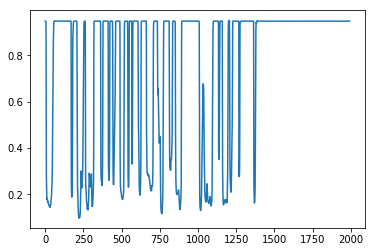

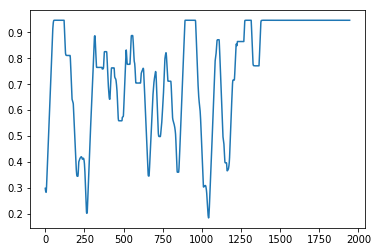

LJ036-0067 (1994, 163)
(1994,)


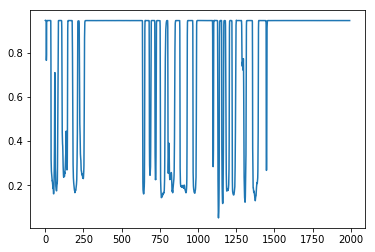

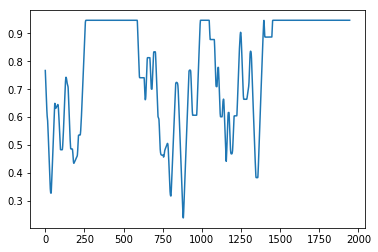

LJ037-0085 (1994, 163)
(1994,)


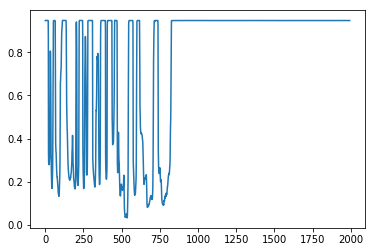

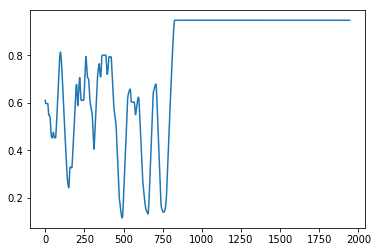

LJ037-0196 (1994, 163)
(1994,)


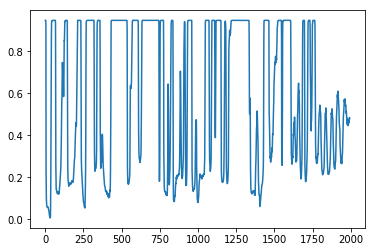

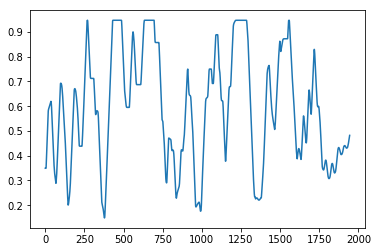

LJ038-0171 (1994, 163)
(1994,)


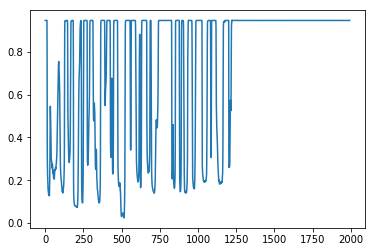

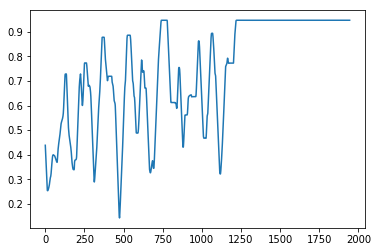

LJ038-0270 (1994, 163)
(1994,)


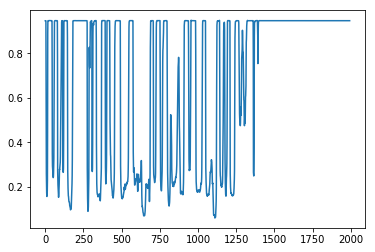

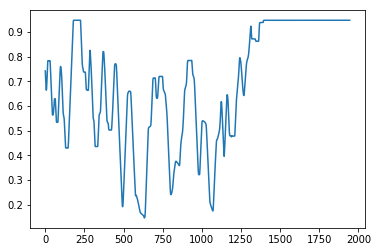

LJ039-0190 (1994, 163)
(1994,)


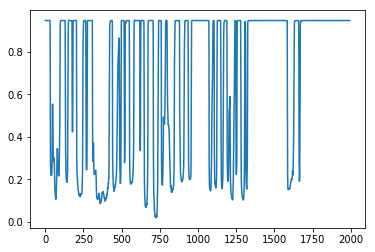

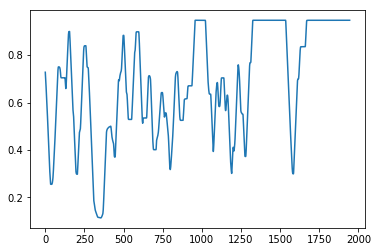

LJ039-0231 (1994, 163)
(1994,)


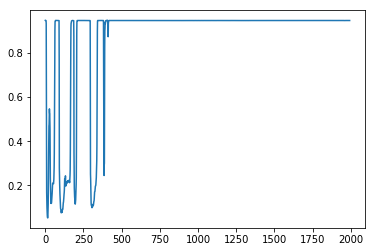

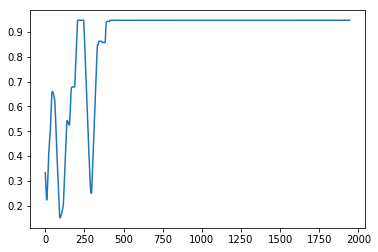

LJ040-0113 (1994, 163)
(1994,)


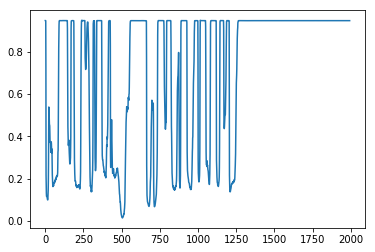

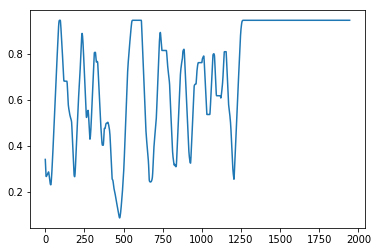

LJ040-0166 (1994, 163)
(1994,)


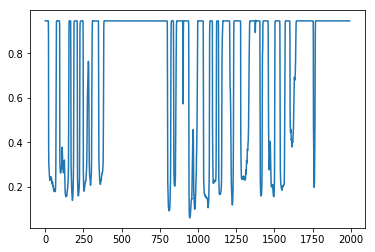

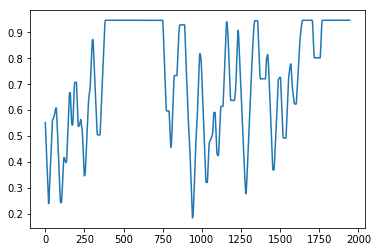

LJ040-0168 (1994, 163)
(1994,)


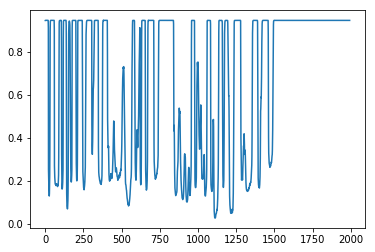

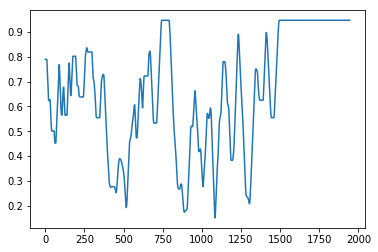

LJ041-0083 (1994, 163)
(1994,)


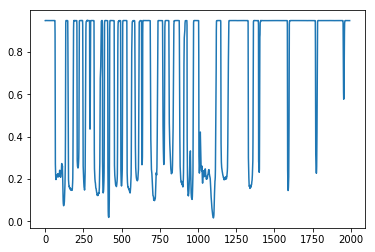

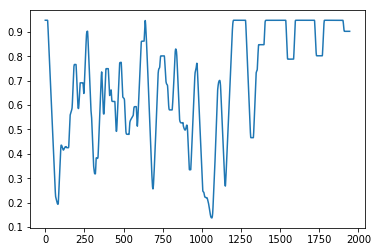

LJ043-0032 (1994, 163)
(1994,)


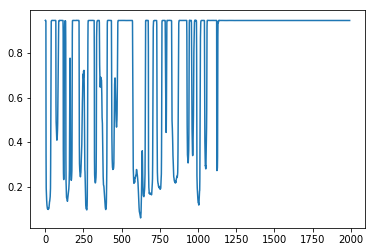

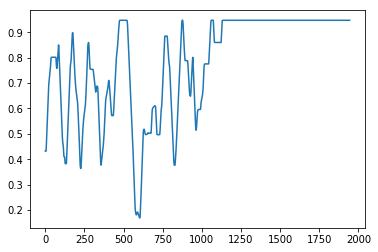

LJ044-0061 (1994, 163)
(1994,)


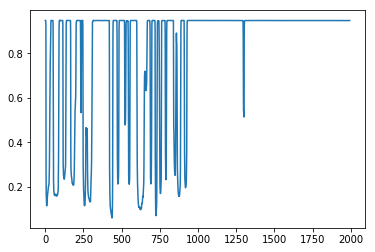

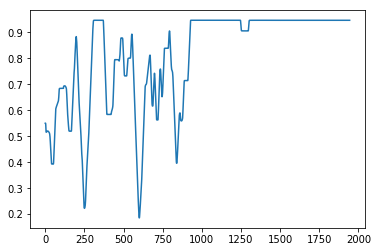

LJ044-0166 (1994, 163)
(1994,)


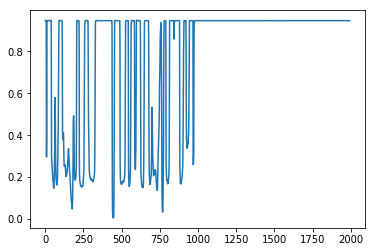

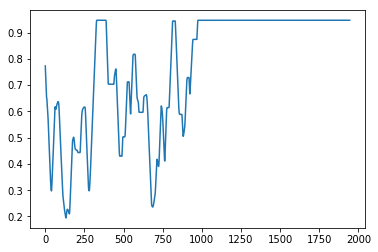

LJ047-0108 (1994, 163)
(1994,)


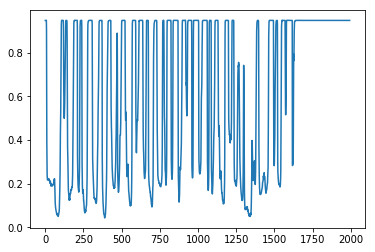

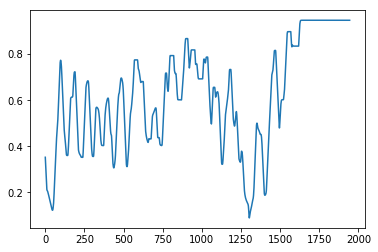

LJ047-0132 (1994, 163)
(1994,)


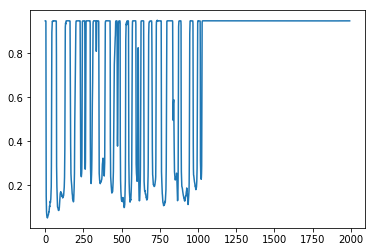

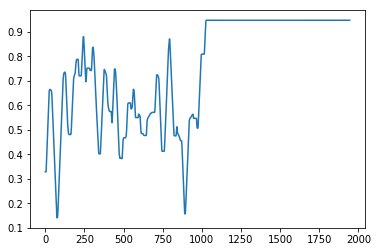

LJ047-0186 (1994, 163)
(1994,)


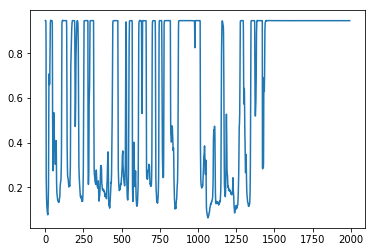

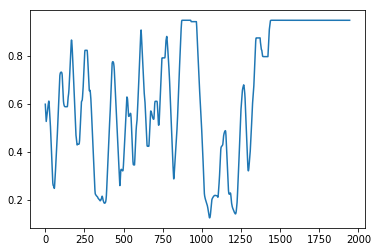

LJ048-0081 (1994, 163)
(1994,)


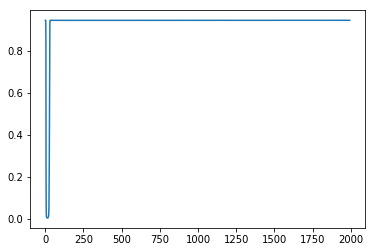

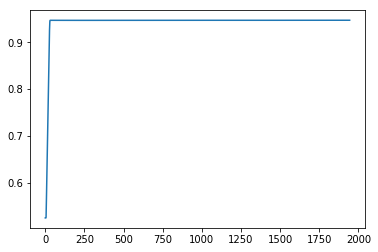

LJ048-0110 (1994, 163)
(1994,)


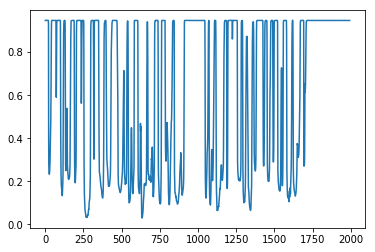

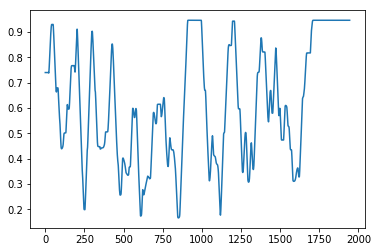

LJ049-0154 (1994, 163)
(1994,)


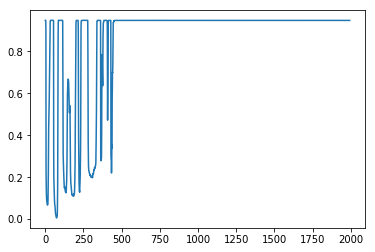

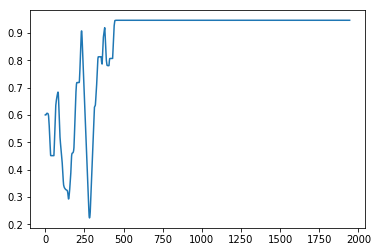

In [46]:
for name in sorted(file_list[-50:]):
    dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163/eval/npy/%s.npy' % (name)
    data = np.load(dirFile_src)
    print name, data.shape

    # for idx_dim in range(130,163,5):
    #     print idx_dim
    #     checkDim(data,idx_dim)

    data_l1norm = np.sum(abs(data[:,145:]), axis=1) / 19 # data.shape[1]
    print data_l1norm.shape
    plt.plot(data_l1norm)
    plt.show()

    plt.plot(np.convolve(data_l1norm, np.ones((50,))/50, mode='valid'))
    plt.show()

(4000, 163)
(4000,)


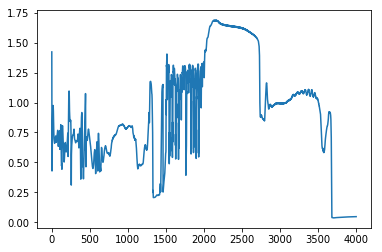

In [21]:
# 201910
# dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-merlin-phone/eval/npy/LJ003-0229.npy'
# dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-merlin-phone/eval/npy/LJ004-0208.npy'
# dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-merlin-phone/eval/npy/eval-53.npy'

dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-eal-joint50-scratch-merlin/eval/npy/LJ004-0208.npy'
# dirFile_src = '/home/dawna/tts/qd212/models/tacotron/results/tacotron-pml-x-163-merlin/eval/npy/LJ001-0073.npy'


data = np.load(dirFile_src)
print data.shape

# for idx_dim in range(0,163,30):
#     print idx_dim
#     checkDim(data,idx_dim)
    
# data_l1norm = np.sum(abs(data[:,145:]), axis=1) / 19
data_l1norm = np.mean(abs(data[:,0:]), axis=1)
print data_l1norm.shape
plt.plot(data_l1norm)
plt.show()

In [15]:
data_l1norm[-700:]

array([ 0.00065306,  0.00066161,  0.00066079,  0.00065751,  0.00064971,
        0.00065262,  0.00066098,  0.0006601 ,  0.00065703,  0.0006494 ,
        0.00065217,  0.00066036,  0.00065942,  0.00065654,  0.00064907,
        0.00065171,  0.00065973,  0.00065876,  0.00065607,  0.00064876,
        0.00065125,  0.00065912,  0.00065814,  0.00065559,  0.00064844,
        0.00065079,  0.00065852,  0.00065751,  0.00065512,  0.00064811,
        0.00065033,  0.00065792,  0.0006569 ,  0.00065466,  0.00064778,
        0.00064987,  0.00065734,  0.0006563 ,  0.00065421,  0.00064744,
        0.00064941,  0.00065677,  0.00065571,  0.00065376,  0.00064709,
        0.00064895,  0.00065621,  0.00065514,  0.00065331,  0.00064676,
        0.0006485 ,  0.00065566,  0.00065457,  0.00065286,  0.00064643,
        0.00064807,  0.00065513,  0.00065401,  0.00065242,  0.00064611,
        0.00064766,  0.0006546 ,  0.00065346,  0.00065197,  0.00064579,
        0.00064727,  0.00065409,  0.00065292,  0.00065152,  0.00

In [23]:
l_list = []
for name in sorted(file_list[-50:]):
    dirFile = '/home/dawna/tts/qd212/data/lj/merlinData/wav_PML_cmp_lf0_fwlspec129_fwnm33_nmnoscale/%s.cmp'%(name)
    data = readLab(dirFile,dim_lab=163)
    print name, data.shape

LJ001-0073 (1413, 163)
LJ003-0229 (1808, 163)
LJ003-0296 (1047, 163)
LJ003-0304 (1173, 163)
LJ004-0208 (923, 163)
LJ005-0065 (1436, 163)
LJ005-0251 (1836, 163)
LJ008-0180 (627, 163)
LJ008-0273 (1263, 163)
LJ008-0309 (1239, 163)
LJ009-0059 (1571, 163)
LJ010-0294 (1310, 163)
LJ011-0089 (1870, 163)
LJ014-0198 (1786, 163)
LJ016-0261 (1712, 163)
LJ018-0317 (1660, 163)
LJ019-0058 (1994, 163)
LJ019-0317 (1251, 163)
LJ019-0356 (1643, 163)
LJ020-0077 (1449, 163)
LJ022-0130 (1768, 163)
LJ022-0177 (1493, 163)
LJ024-0101 (1993, 163)
LJ027-0016 (1665, 163)
LJ027-0049 (1210, 163)
LJ028-0444 (1844, 163)
LJ030-0208 (969, 163)
LJ032-0128 (810, 163)
LJ034-0186 (1324, 163)
LJ035-0174 (1235, 163)
LJ036-0067 (1425, 163)
LJ037-0085 (1553, 163)
LJ037-0196 (1652, 163)
LJ038-0171 (1245, 163)
LJ038-0270 (1483, 163)
LJ039-0190 (1668, 163)
LJ039-0231 (333, 163)
LJ040-0113 (1640, 163)
LJ040-0166 (1662, 163)
LJ040-0168 (1727, 163)
LJ041-0083 (1346, 163)
LJ043-0032 (1147, 163)
LJ044-0061 (1112, 163)
LJ044-0166 (960,

In [3]:
# 201910 swap phone
import sys
sys.path.append('/home/dawna/tts/qd212/models/tacotron/')
# from tacotron.utils import cmudict

def _get_cmu_dict(datadir):
    from tacotron.utils import cmudict_p27 as cmudict
    cmudict_path = os.path.join(datadir, 'cmudict-0.7b')
    if not os.path.isfile(cmudict_path):
        raise Exception('If use_cmudict=True, you must download ' +
                        'http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b to %s' % cmudict_path)
    cmu_dict = cmudict.CMUDict(cmudict_path, keep_ambiguous=True)
    print ('Loaded CMUDict with %d unambiguous entries' % len(cmu_dict))
    return cmu_dict

def _do_get_arpabet(word, cmu_dict):
    arpabet = cmu_dict.lookup(word)
    return '{%s}' % arpabet[0] if arpabet is not None else word

def sentences_2_phones(sentences, cmu_dict):
#     cmu_dict = _get_cmu_dict(datadir)
    phones = [' '.join([str(_do_get_arpabet(word, cmu_dict)) for word in text.split(' ')]) for text in sentences]
    return phones

In [58]:
with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences.txt','r') as f:
    sentences = f.readlines()
print sentences[-1]

cmu_dict = _get_cmu_dict('/scratch/qd212/tacotron/163-lj-training/')
phones = sentences_2_phones(sentences, cmu_dict)
print phones[-1]

with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences_asup.txt','w') as f:
    f.write("".join(phones))

He has hidden the helicopter in his humble house .
Loaded CMUDict with 125022 unambiguous entries
{HH IY1} {HH AE1 Z} {HH IH1 D AH0 N} {DH AH0} {HH EH1 L IH0 K AA2 P T ER0} {IH0 N} {HH IH1 Z} {HH AH1 M B AH0 L} {HH AW1 S} .


In [4]:
# 201910 swap phone
import re

# rep_list = [['H',''], ['HH',''], ['AH','OH'], ['AA','OH'], ['IY','UW'], ['TH','S'], ['TH','Z'], ['DH','S'], ['DH','Z'], ['DH','D'], ['IH','IY'], ['AA','AE'], ['OW','OH'], ['EY','EH'], ['JH','ZH'], ['CH','SH'], ['Y','JH']]
rep_list = [['HH',''],['CH','SH']]
rep = {r[0]:r[1] for r in rep_list}

# use these three lines to do the replacement
rep = dict((re.escape(k), v) for k, v in rep.iteritems()) 
#Python 3 renamed dict.iteritems to dict.items so use rep.items() for latest versions
pattern = re.compile("|".join(rep.keys()))

In [60]:
with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences_asup.txt','r') as f:
    sentences = f.readlines()
tmp = [pattern.sub(lambda m: rep[re.escape(m.group(0))], s) for s in sentences]
with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences_asup_fr.txt','w') as f:
    f.write("".join(tmp))

In [5]:
with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences_phone_punc.txt','r') as f:
    sentences = f.readlines()
tmp = [pattern.sub(lambda m: rep[re.escape(m.group(0))], s) for s in sentences]
with open('/home/dawna/tts/qd212/models/tacotron/tests/sentences_phone_punc_fr.txt','w') as f:
    f.write("".join(tmp))

In [10]:
# phones = 'As {B EY1 K ER0} {R IY1 CH T} the {S EH1 K AH0 N D} floor, {HH IY1} was {AH0 B AW1 T} {T W EH1 N T IY0} {F IY1 T} {F R AH1 M} the {V EH1 S T IH0 B Y UW2 L} door. {HH IY1} {IH2 N T EH1 N D IH0 D} to {K AH0 N T IH1 N Y UW0} around to his {L EH1 F T} toward the {S T EH1 R W EY2} going {AH1 P}'
# phones = pattern.sub(lambda m: rep[re.escape(m.group(0))], phones)
# print phones

As {B EH1 K ER0} {R UW1 SH T} the {S E1 K OH0 N D} floor, { UW1} was {OH0 B AW1 T} {T W E1 N T UW0} {F UW1 T} {F R OH1 M} the {V E1 S T IY0 B JH UW2 L} door. { UW1} {IY2 N T E1 N D IY0 D} to {K OH0 N T IY1 N JH UW0} around to his {L E1 F T} toward the {S T E1 R W EH2} going {OH1 P}


In [55]:
_do_get_arpabet('huge', cmu_dict)

'huge'

In [29]:
text = 'I have fish and chips.'
print ' '.join([str(_do_get_arpabet(word, cmu_dict)) for word in text.split(' ')])

{AY1} {HH AE1 V} {F IH1 SH} {AH0 N D} chips.


In [30]:
text.split(' ')

['I', 'have', 'fish', 'and', 'chips.']